In [1]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from torch.utils.data import Dataset

In [2]:
class MnistDataset(Dataset):
  def __init__(self, csv_file):
    self.data_df = pd.read_csv(csv_file, header=None)
    pass
  
  def __len__(self):
    return len(self.data_df)

  def __getitem__(self, index):
    label = self.data_df.iloc[index, 0]
    target = torch.zeros((10))
    target[label] = 1.0

    image_values = torch.FloatTensor(self.data_df.iloc[index, 1:].values) / 255.0
    return label, image_values, target

  def plot_image(self, index):
    img = self.data_df.iloc[index, 1:].values.reshape(28, 28)
    plt.title("label = " + str(self.data_df.iloc[index, 0]))
    plt.imshow(img, interpolation='none', cmap='Blues')
    pass

In [3]:
mnist_dataset = MnistDataset("./mnist_dataset/mnist_train.csv")

In [ ]:
mnist_dataset.plot_image(17)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.Sigmoid(),
            nn.Linear(200, 1),
            nn.Sigmoid()
        )

        self.loss_function = nn.MSELoss()

        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        self.counter = 0
        self.progress = []

        pass

    def forward(self, inputs):
        return self.model(inputs)

    def train(self, inputs, targets):
        outputs = self.forward(inputs)

        loss = self.loss_function(outputs, targets)
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        pass

    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim = (0, 1.0), figsize=(16, 8), alpha=0.1, marker = '.', grid=True, yticks = (0, 0.25, 0.5))
        pass

In [7]:
def generate_random(size):
    random_data = torch.rand(size)
    return random_data

In [20]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.LeakyReLU(0.02),
            nn.LayerNorm(200),
            nn.Linear(200, 1),
            nn.Sigmoid()
        )

        self.loss_function = nn.BCELoss()

        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.01)

        self.counter = 0
        self.progress = []

        pass

    def forward(self, inputs):
        return self.model(inputs)

    def train(self, inputs, targets):
        outputs = self.forward(inputs)

        loss = self.loss_function(outputs, targets)
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        pass

    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim = (0), figsize=(16, 8), alpha=0.1, marker = '.', grid=True, yticks = (0, 0.25, 0.5, 1.0, 5.0))
        pass

In [19]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            # nn.Linear(1, 200),
            nn.Linear(100, 200),
            nn.LeakyReLU(0.02),
            nn.LayerNorm(200),
            nn.Linear(200, 784),
            nn.Sigmoid()
        )

        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.01)

        self.counter = 0
        self.progress = []

        pass

    def forward(self, inputs):
        return self.model(inputs)

    def train(self, D, inputs, targets):
        g_output = self.forward(inputs)

        d_output = D.forward(g_output)

        loss = D.loss_function(d_output, targets)

        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass

        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        pass

    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim = (0), figsize=(16, 8), alpha=0.1, marker = '.', grid=True, yticks = (0, 0.25, 0.5, 1.0, 5.0))
        pass

In [8]:
%%time
D = Discriminator().cuda(0)
G = Generator().cuda(0)

for lable, image_data_tensor, target_tensor in mnist_dataset:
    D.train(image_data_tensor.cuda(0), torch.FloatTensor([1.0]).cuda(0))
    D.train(G.forward(generate_random(100).cuda(0)).cuda(0).detach(), torch.FloatTensor([0.0]).cuda(0))
    G.train(D, generate_random(100).cuda(0), torch.FloatTensor([1.0]).cuda(0))
    pass

counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
Wall time: 6min 22s


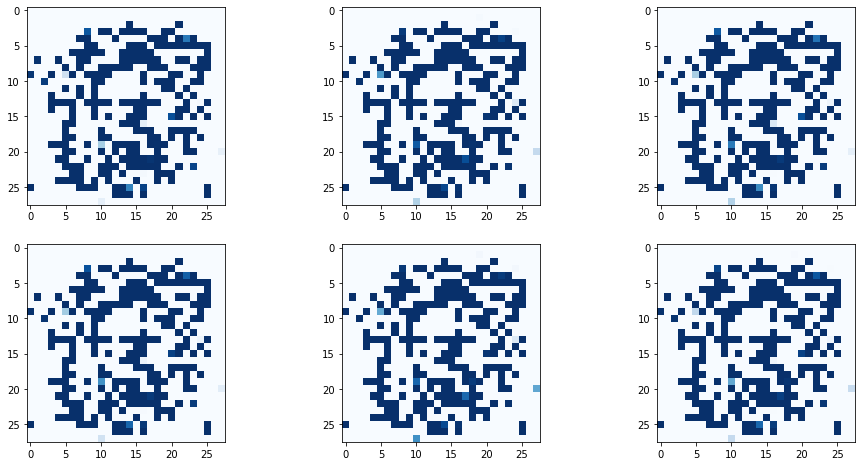

In [9]:
# 생성기 Linear(100, 200) 시작

f, axarr = plt.subplots(2, 3, figsize=(16,8))
for i in range(2):
    for j in range(3):
        output = G.forward(generate_random(100).cuda(0))
        img = output.cpu().detach().numpy().reshape(28, 28)
        axarr[i, j].imshow(img, interpolation='none', cmap='Blues')
        pass
    pass

In [10]:
def generate_random_image(size):
    random_data = torch.rand(size)
    return random_data

def generate_random_seed(size):
    random_data = torch.randn(size)
    return random_data

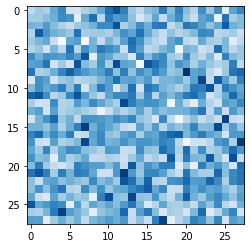

In [17]:
G = Generator()

output = G.forward(generate_random_seed(100))

img = output.detach().numpy().reshape(28,28)

plt.imshow(img, interpolation='none', cmap='Blues')

In [18]:
%%time
D = Discriminator().cuda(0)
G = Generator().cuda(0)

epochs = 4

for epoch in range(epochs):
    print ("epoch = ", epoch + 1)
    for lable, image_data_tensor, target_tensor in mnist_dataset:
        D.train(image_data_tensor.cuda(0), torch.FloatTensor([1.0]).cuda(0))
        D.train(G.forward(generate_random_seed(100).cuda(0)).cuda(0).detach(), torch.FloatTensor([0.0]).cuda(0))
        G.train(D, generate_random_seed(100).cuda(0), torch.FloatTensor([1.0]).cuda(0))
        pass

epoch =  1
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
epoch =  2
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
counter =  190000
counter =  200000
counter =  210000
counter =  220000
counter =  230000
counter =  240000
epoch =  3
counter =  250000
counter =  260000
counter =  270000
counter =  280000
counter =  290000
counter =  300000
counter =  310000
counter =  320000
counter =  330000
counter =  340000
counter =  350000
counter =  360000
epoch =  4
counter =  370000
counter =  380000
counter =  390000
counter =  400000
counter =  410000
counter =  420000
counter =  430000
counter =  440000
counter =  450000
counter =  460000
counter =  470000
counter =  480000
Wall time: 25min 14s


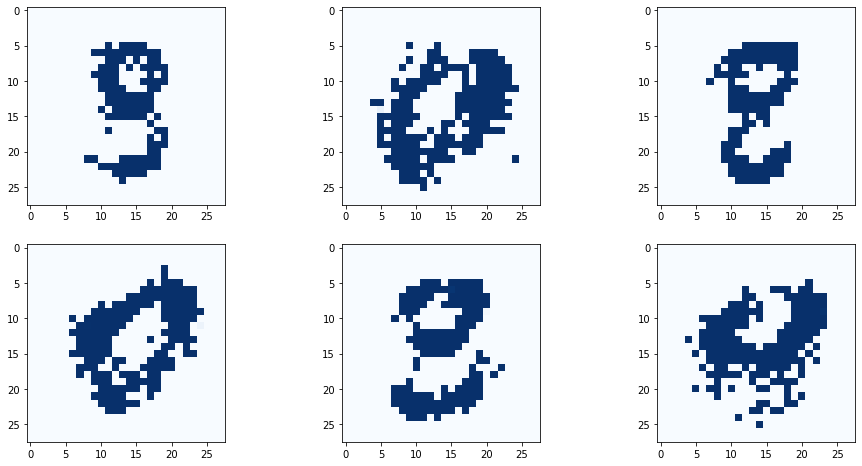

In [22]:
f, axarr = plt.subplots(2, 3, figsize=(16,8))
for i in range(2):
    for j in range(3):
        output = G.forward(generate_random_seed(100).cuda(0))
        img = output.cpu().detach().numpy().reshape(28, 28)
        axarr[i, j].imshow(img, interpolation='none', cmap='Blues')
        pass
    pass

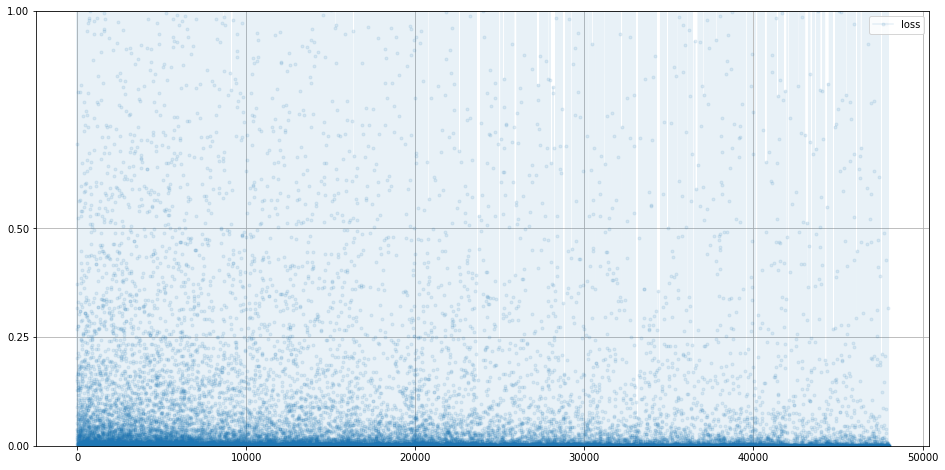

In [23]:
D.plot_progress()

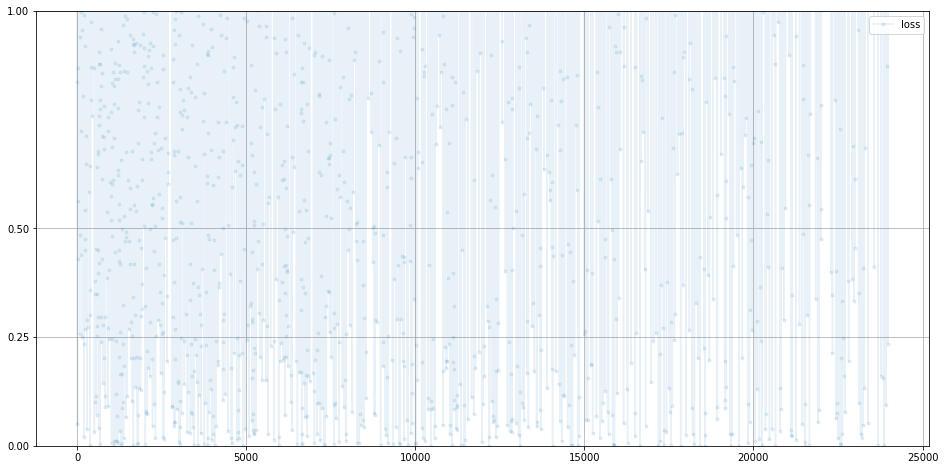

In [24]:
G.plot_progress()

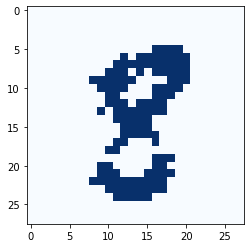

In [32]:
seed1 = generate_random_seed(100).cpu()
out1 = G.cpu().forward(seed1)
img1 = out1.detach().numpy().reshape(28, 28)
plt.imshow(img1, interpolation='none', cmap='Blues')

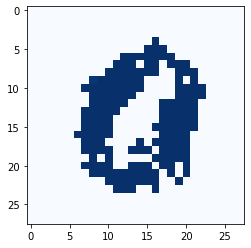

In [34]:
seed2 = generate_random_seed(100)
out2 = G.cpu().forward(seed2)
img2 = out2.detach().numpy().reshape(28, 28)
plt.imshow(img2, interpolation='none', cmap='Blues')

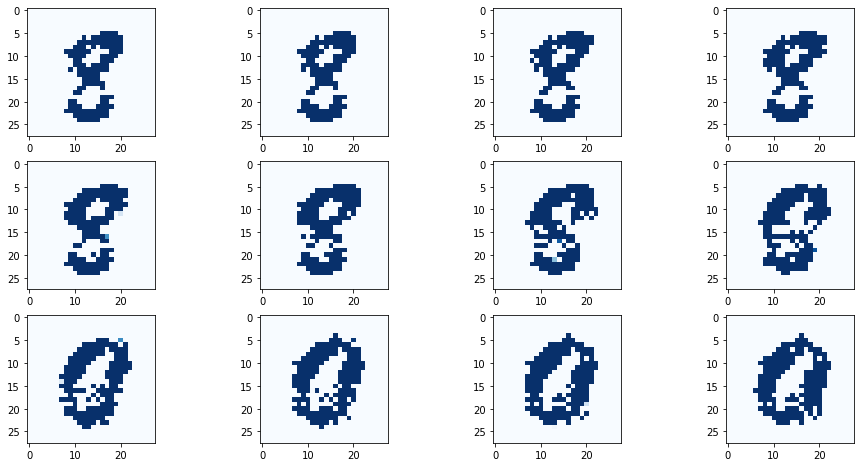

In [37]:
count = 0

f, axarr = plt.subplots(3,4, figsize=(16,8))
for i in range(3):
    for j in range(4):
        seed = seed1 + (seed2 - seed1) / 11 * count
        output = G.cpu().forward(seed)
        img = output.detach().numpy().reshape(28, 28)
        axarr[i, j].imshow(img, interpolation='none', cmap='Blues')
        count = count + 1
        pass
    pass

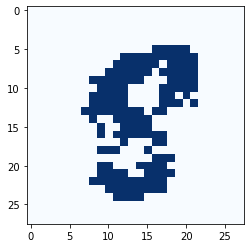

In [38]:
seed3 = seed1 + seed2
out3 = G.cpu().forward(seed3)
img3 = out3.detach().numpy().reshape(28, 28)
plt.imshow(img3, interpolation='none', cmap='Blues')

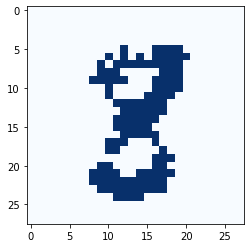

In [39]:
seed4 = seed1 - seed2
out4 = G.cpu().forward(seed4)
img4 = out4.detach().numpy().reshape(28, 28)
plt.imshow(img4, interpolation='none', cmap='Blues')